In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("zomato.csv" , encoding='latin-1' )
# df.head()
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [6]:
# df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## I. Missing Values
## II. Explore about the numerical variables
## III.Explore about the categorical variables
## IV. Finding relationships between features

In [9]:
df.isnull().sum() #for missing values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
[features for features in df.columns if df[features].isnull().sum()>0] #list Comprehension

['Cuisines']

<Axes: >

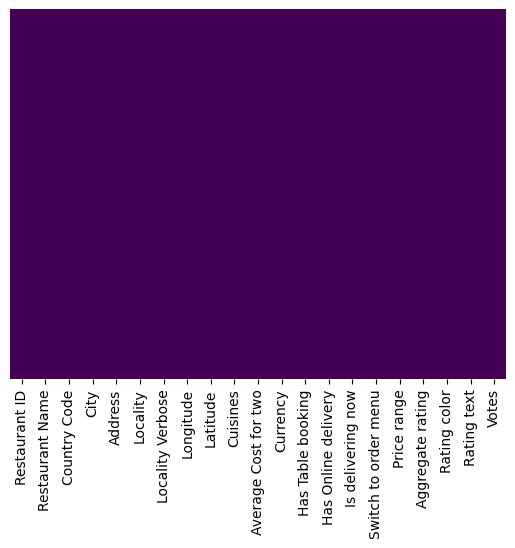

In [12]:
sns.heatmap(df.isnull(), yticklabels = False , cbar = False , cmap= 'viridis')

In [15]:
dc = pd.read_excel("Country-Code.xlsx")
dc.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


### We have to merge tw|o different datasets thorugh country code column

In [17]:
final_df =pd.merge(df , dc , on='Country Code' , how= 'left')

In [18]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


#### to check data types

In [19]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [20]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [25]:
# final_df.Country.value_counts()
country_names=final_df.Country.value_counts().index
country_values=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7fbd6803c310>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

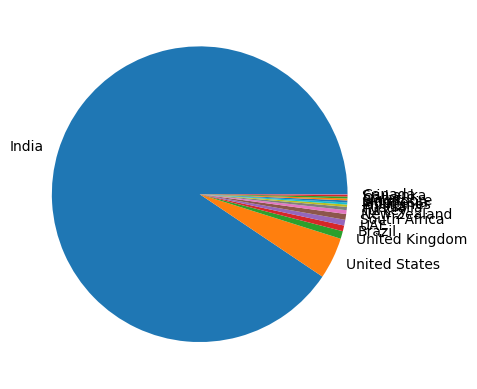

In [26]:
#Pie Chart ( for all countries -> the graph looks bad because majority of the usage of zomato comes from India)
plt.pie(country_values, labels= country_names)

([<matplotlib.patches.Wedge at 0x7fbd6572ae60>,
 [Text(0.05955283135932176, 1.0983867535058351, 'United States'),
  Text(-1.0839130553784748, -0.1874366249698801, 'United Kingdom'),
  Text(-0.8686755358397953, -0.6748353972884384, 'Brazil'),
  Text(-0.5186423589436286, -0.9700567527260395, 'UAE'),
  Text(-0.07873451622729077, -1.0971785980206024, 'South Africa'),
  Text(0.30168170855161863, -1.0578223606661832, 'New Zealand'),
  Text(0.5621608629138202, -0.9455025987314838, 'Turkey'),
  Text(0.7409816707355935, -0.8129859553730856, 'Australia'),
  Text(0.8615532061409449, -0.683905017519435, 'Phillipines'),
  Text(0.9542255791340912, -0.5472234864533945, 'Indonesia'),
  Text(1.0225842454031517, -0.4053658360706623, 'Singapore'),
  Text(1.0690887770882502, -0.25893857708721196, 'Qatar'),
  Text(1.0947384670857838, -0.10746017254158982, 'Sri Lanka'),
  Text(1.099892538291104, -0.015375441832756262, 'Canada')],
 [Text(0.032483362559630045, 0.5991200473668191, '48.28%'),
  Text(-0.59122530

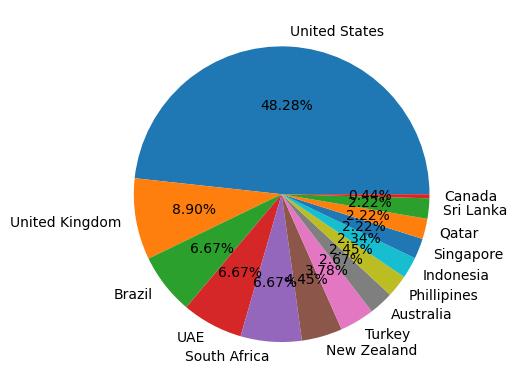

In [31]:
#Pie Chart ( for all countries except India)
plt.pie(country_values[1:], labels= country_names[1:] , autopct = '%1.2f%%')

### Observation : Zomato maximum records or transactions from India . After India , near half of the transactions/records/usage comes from USA

In [32]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [35]:
final_df.groupby(['Aggregate rating','Rating color' , 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

##### Reseting the index columns and nomenclaturing it as 'Rating count'

In [39]:
final_df.groupby(['Aggregate rating','Rating color' , 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [40]:
ratings = final_df.groupby(['Aggregate rating','Rating color' , 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

#### Observations - I. Whenever Rating is 4.5+ -> Excellent
####              II. Whenever Rating is 4-4.4 -> Very Good
####              III. Whenever Rating is 3.5-4 -> Good
####               IV. Whenever Rating is 2.5-3.4-> Average
####               V. Whenever Rating is <2.5 -> Poor

In [41]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

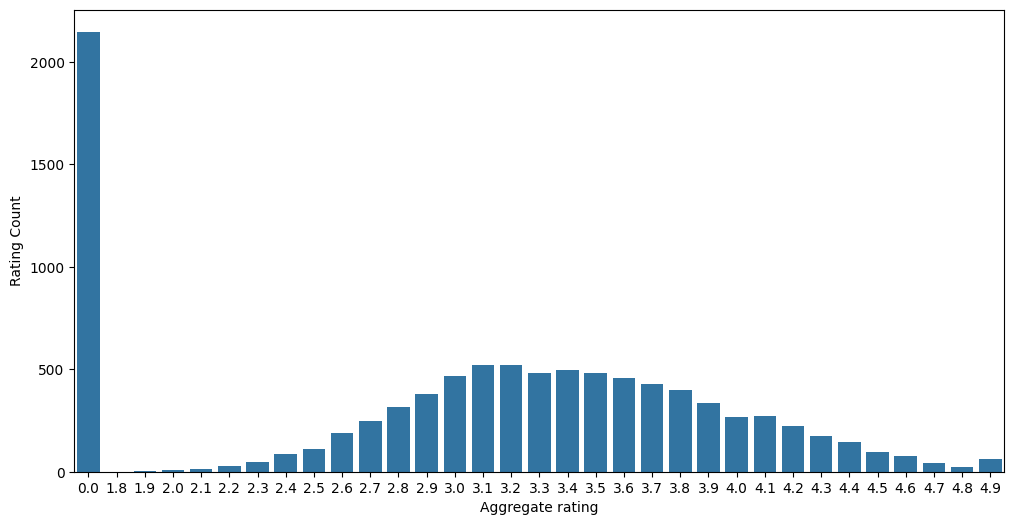

In [43]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating' , y= 'Rating Count' , data=ratings )

#### Color the plot according the rating color

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

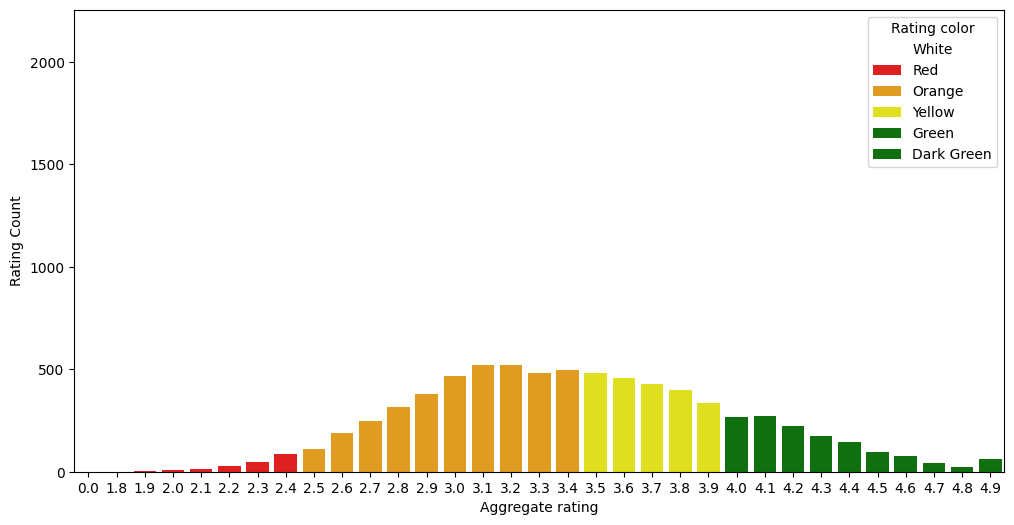

In [48]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating' , y= 'Rating Count' ,hue= 'Rating color' ,data=ratings , palette =['white' , 'red' , 'orange' , 'yellow' , 'green' , 'green'])

#### Observation : I. Not rated count is very high. II. maximum number of rating are between 2.5-3.4

/tmp/ipykernel_12883/2820443800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color' , data = ratings , palette =['Black' , 'red' , 'orange' , 'yellow' , 'green' , 'green'])


<Axes: xlabel='Rating color', ylabel='count'>

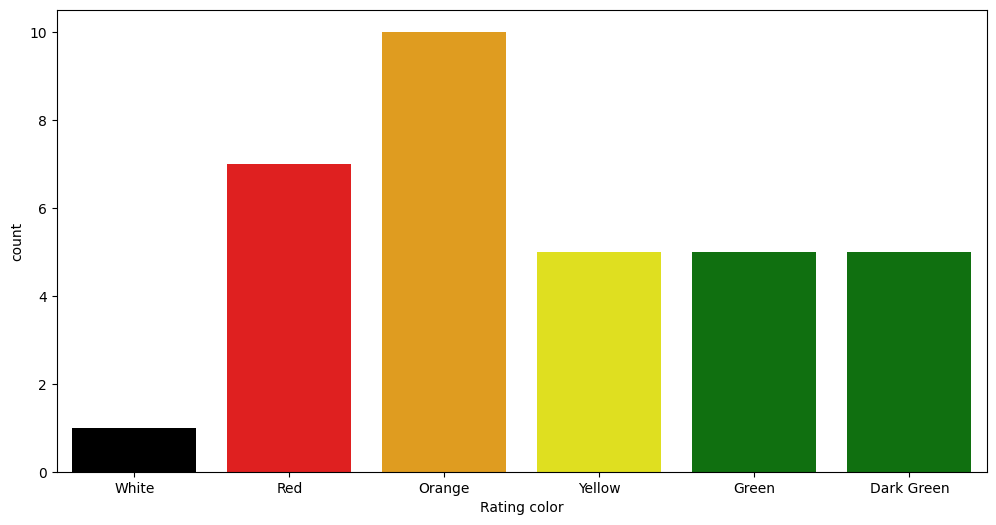

In [51]:
# Count Plot
sns.countplot(x='Rating color' , data = ratings , palette =['Black' , 'red' , 'orange' , 'yellow' , 'green' , 'green'])

#### The countries that has given zero ratings

In [57]:
final_df[final_df['Aggregate rating'] == 0.0].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


#### Observation : Maximum number of zero ratings are from Indian Customers

In [60]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [62]:
final_df[final_df['Currency']].groupby('Country').size().reset_index()

KeyError: "None of [Index(['Botswana Pula(P)', 'Botswana Pula(P)', 'Botswana Pula(P)',\n       'Botswana Pula(P)', 'Botswana Pula(P)', 'Botswana Pula(P)',\n       'Botswana Pula(P)', 'Botswana Pula(P)', 'Botswana Pula(P)',\n       'Botswana Pula(P)',\n       ...\n       'Turkish Lira(TL)', 'Turkish Lira(TL)', 'Turkish Lira(TL)',\n       'Turkish Lira(TL)', 'Turkish Lira(TL)', 'Turkish Lira(TL)',\n       'Turkish Lira(TL)', 'Turkish Lira(TL)', 'Turkish Lira(TL)',\n       'Turkish Lira(TL)'],\n      dtype='object', length=9551)] are in the [columns]"

In [67]:
final_df.groupby(['Country' , 'Currency' ]).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [68]:
final_df.groupby(['Country' , 'Has Online delivery' ]).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [69]:
final_df[final_df['Has Online delivery'] == "Yes"].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

#### Observation: I. Online Deliveries are only available in India & UAE

### Pie chart for Top 5 distribution  
# ⬇

([<matplotlib.patches.Wedge at 0x7fbd61af54b0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

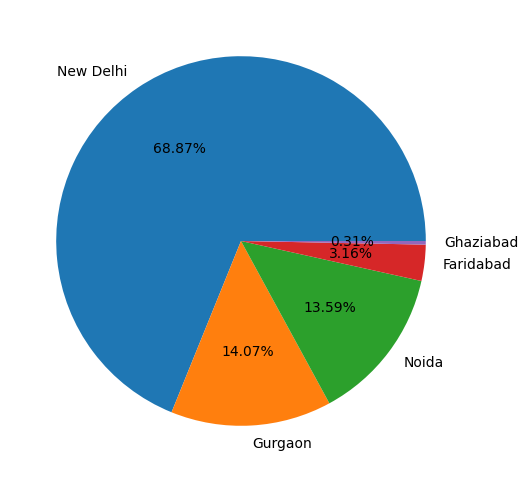

In [73]:
plt.pie(final_df.City.value_counts().values[:5] , labels= final_df.City.value_counts().index[:5] , autopct = '%1.2f%%')

#### Observation : Most of the odrers came from New Delhi ( more than two-third)

## Most ordered food items in India
# ⬇


In [80]:
indian_cuisines_count = final_df[final_df['Country'] == 'India'].groupby('Cuisines').size().reset_index(name='Count')

In [86]:
indian_top_cuisines = indian_cuisines_count.sort_values(by='Count', ascending=False)

In [87]:
indian_top_cuisines.head(10)


,Cuisines,Count
945,North Indian,936
968,"North Indian, Chinese",511
581,Fast Food,348
297,Chinese,340
1151,"North Indian, Mughlai",334
164,Cafe,279
80,Bakery,216
1157,"North Indian, Mughlai, Chinese",197
88,"Bakery, Desserts",170
1335,Street Food,149


## Observation :  North indian delicacies are the most ordered food items in India followed by Fast Foods and Chinese